In [1]:
IMG_SIZE = 224
num_classes = 10
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

In [2]:
import tensorflow as tf
import keras
from keras import layers
from keras.applications import EfficientNetB0
from keras.applications import ResNet50
import tensorflow_hub as hub

In [3]:
inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
model_resnet_app = ResNet50(include_top=False, input_tensor=inputs, weights="imagenet")

94765736/94765736 [==============================] - 0s 0us/step


In [4]:
tf.keras.utils.plot_model(model_resnet_app, show_shapes=True, show_layer_names=True)

Output hidden; open in https://colab.research.google.com to view.

In [24]:
model_resnet_hub = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/tensorflow/resnet-50/frameworks/TensorFlow2/variations/classification/versions/1")
])
model_resnet_hub.build([None, 224, 224, 3])
#model_resnet_hub.summary()

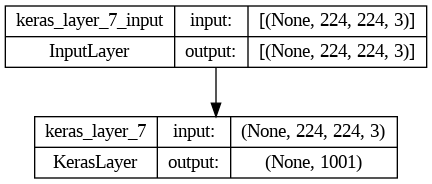

In [25]:
tf.keras.utils.plot_model(model_resnet_hub, show_shapes=True, show_layer_names=True)

In [26]:
model_resnet_hub.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_7 (KerasLayer)  (None, 1001)              25612201  
                                                                 
Total params: 25612201 (97.70 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 25612201 (97.70 MB)
_________________________________________________________________


In [27]:
for i, layer in enumerate(model_resnet_hub.layers):
    print(f"Layer {i + 1}: {layer.name}, Output Shape: {layer.output_shape}, Trainable: {layer.trainable}")

Layer 1: keras_layer_7, Output Shape: (None, 1001), Trainable: False
